In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.util import random_noise
from skimage import io


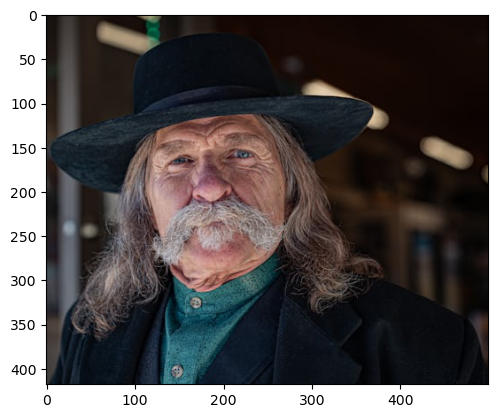

In [12]:
image = io.imread("https://images.unsplash.com/photo-1711579657485-bb18e60e4152?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Njd8fG9sZCUyMGNvd2JveXxlbnwwfHwwfHx8MA%3D%3D")
plt.imshow(image);

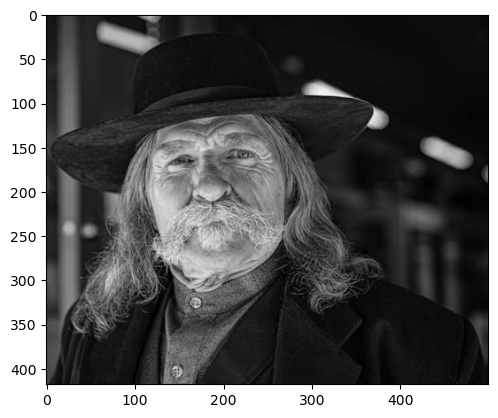

In [13]:
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image_gray, cmap='gray');

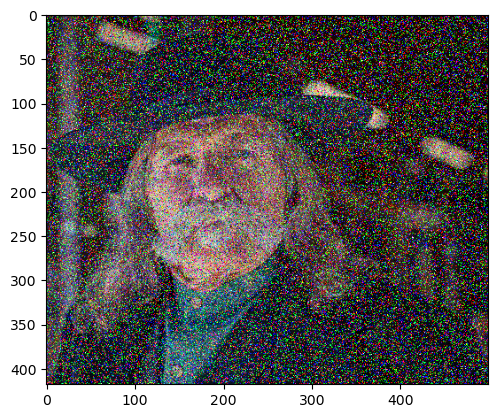

In [15]:
noisy_image = random_noise(image, mode='s&p', amount=0.25)
noisy_image = np.array(255 * noisy_image, dtype=np.uint8)
plt.imshow(noisy_image);

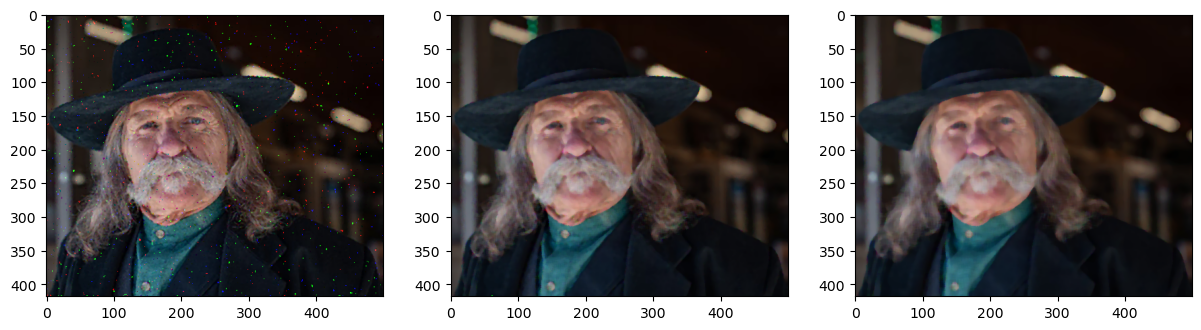

In [23]:
image_filtered_3 = cv2.medianBlur(noisy_image ,3)
image_filtered_5 = cv2.medianBlur(noisy_image ,5)
image_filtered_7 = cv2.medianBlur(noisy_image ,7)

plt.figure(figsize=(20,20))
plt.subplot(1, 4, 1)
plt.imshow(image_filtered_3, cmap='gray')
plt.subplot(1, 4, 2)
plt.imshow(image_filtered_5, cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(image_filtered_7, cmap='gray')
plt.show()

In [24]:
def roberts_filter(img):
  img = img.astype(np.int16)
  filtered_img = np.zeros((img.shape))
  for x in range (1, img.shape[0]-1):
    for y in range (1, img.shape[1]-1):
      gy = img[x, y] - img[x+1, y+1]
      gx = img[x+1, y] - img[x, y+1]
      filtered_img[x,y] = np.sqrt(gy**2 + gx**2)
  return filtered_img.astype(np.uint8)

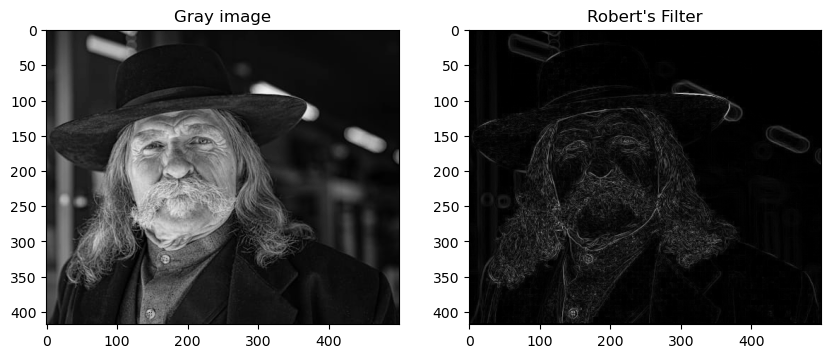

In [26]:
roberts_image = roberts_filter(image_gray)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.title("Gray image")
plt.imshow(image_gray, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Robert's Filter")
plt.imshow(roberts_image, cmap='gray')
plt.show()

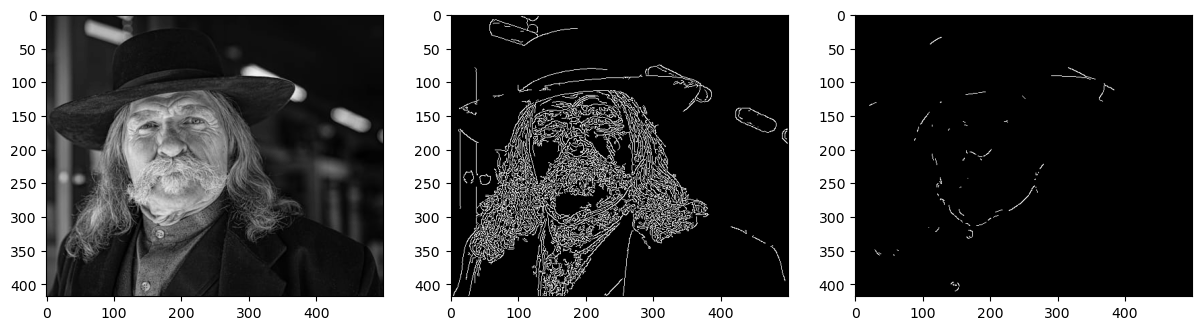

In [27]:
# Setting parameter values
t_lower1 = 50  # Lower Threshold
t_upper1 = 150  # Upper threshold

# Applying the Canny Edge filter
canny_image1 = cv2.Canny(image_gray, t_lower1, t_upper1)

t_lower2 = 350  # Lower Threshold
t_upper2 = 450  # Upper threshold

canny_image2 = cv2.Canny(image_gray, t_lower2, t_upper2)

plt.figure(figsize=(20,20))
plt.subplot(1, 4, 1)
plt.imshow(image_gray, cmap='gray')
plt.subplot(1, 4, 2)
plt.imshow(canny_image1, cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(canny_image2, cmap='gray')
plt.show()